In [1]:
# NECESSARY IMPORTS------------------------------------ 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# LOADING THE CSV DATA FILE ---------------------------
df = pd.read_csv('data2.csv')


In [2]:
df.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [3]:
# FINDING ALL THE COLUMNS CONTAINING nanS

nan_cols = df.columns[df.isna().any()].tolist()
nan_cols

['Income', 'Family Size']

In [4]:
from sklearn.impute import SimpleImputer

# IMPUTING NAN VALUES WITH THEIR MEAN 
imputer = SimpleImputer(strategy='mean')
df[nan_cols] = imputer.fit_transform(df[nan_cols])

In [5]:
nan_cols = df.columns[df.isna().any()].tolist()
nan_cols

[]

In [6]:

# SEPERATING X AND Y
# ALSO DROPPING ----'Postal Code','ID'----- AS THEY dont appear to be contributing features 
X = df.drop(['Personal Loan','Postal Code','ID'], axis=1)
y = df['Personal Loan']

In [7]:
X.head()

,Age,Experience,Income,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking
0,25,1,49.000000,4.0,1.6,Undergrad,0,1,0,NO
1,45,19,34.000000,3.0,1.5,Undergrad,0,1,0,NO
2,39,15,11.000000,1.0,1.0,Undergrad,0,0,0,NO
3,35,9,73.840361,1.0,2.7,Graduate,0,0,0,NO
4,35,8,45.000000,4.0,1.0,Graduate,0,0,0,NO


In [8]:
y.head()

0    NO
1    NO
2    NO
3    NO
4    NO
Name: Personal Loan, dtype: object

# Separating the features 

In [9]:
# features requiring ---- one hot encoding
categorical_features =['InternetBanking']  

# features requiring ----  label encoding
output_feature='Personal Loan'

# features requiring ----  ordinal encoding
ordinal_feature=['Education']

# no encoding required
numerical_features = ['Age','Experience','Income','CCAvgSpending','Family Size','Mortgage','Investment Account','Deposit Account']

In [10]:
onehot = OneHotEncoder(drop='first',sparse=False)
scaler = StandardScaler()

In [11]:

# Apply one-hot encoding and standard scaling to categorical and numeric features, respectively
X_cat = onehot.fit_transform(X[categorical_features])

X_cat

c:\Users\mayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [12]:
type(X_cat)

numpy.ndarray

In [13]:

X_num = scaler.fit_transform(X[numerical_features])
X_num

array([[-1.77441684, -1.66607847, -0.54021418, ..., -0.55552393,
         2.92891517, -0.25354028],
       [-0.02952359, -0.09633022, -0.86642572, ..., -0.55552393,
         2.92891517, -0.25354028],
       [-0.55299157, -0.44516316, -1.36661675, ..., -0.55552393,
        -0.34142334, -0.25354028],
       ...,
       [ 1.54088033,  1.64783451, -1.08390008, ..., -0.55552393,
        -0.34142334, -0.25354028],
       [ 1.71536965,  1.73504275, -0.54021418, ..., -0.55552393,
        -0.34142334, -0.25354028],
       [-1.51268285, -1.40445376,  0.19919866, ..., -0.55552393,
        -0.34142334, -0.25354028]])

In [14]:
df[['Education']]

,Education
0,Undergrad
1,Undergrad
2,Undergrad
3,Graduate
4,Graduate
...,...
4995,Advanced Degree
4996,Undergrad
4997,Advanced Degree
4998,Graduate


In [15]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_categories = ['Undergrad', 'Graduate', 'Advanced Degree']

oe = OrdinalEncoder(categories=[ordinal_categories])
X_ordinal= oe.fit_transform(df[['Education']])
# df['Education'] = oe.fit_transform(df[['Education']])
X_ordinal

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [16]:

# Concatenating all the features together  ------
X_preprocessed = pd.concat([pd.DataFrame(X_cat, columns=categorical_features), pd.DataFrame(X_num, columns=numerical_features),pd.DataFrame(X_ordinal,columns=ordinal_feature)] ,axis=1)
X_preprocessed

,InternetBanking,Age,Experience,Income,CCAvgSpending,Family Size,Mortgage,Investment Account,Deposit Account,Education
0,0.0,-1.774417,-1.666078,-0.540214,-0.193385,1.397759,-0.555524,2.928915,-0.25354,0.0
1,0.0,-0.029524,-0.096330,-0.866426,-0.250611,0.525950,-0.555524,2.928915,-0.25354,0.0
2,0.0,-0.552992,-0.445163,-1.366617,-0.536736,-1.217668,-0.555524,-0.341423,-0.25354,0.0
3,0.0,-0.901970,-0.968413,0.000000,0.436091,-1.217668,-0.555524,-0.341423,-0.25354,1.0
4,0.0,-0.901970,-1.055621,-0.627204,-0.536736,1.397759,-0.555524,-0.341423,-0.25354,1.0
...,...,...,...,...,...,...,...,...,...,...
4995,1.0,-1.425438,-1.491662,-0.735941,-0.021710,-1.217668,-0.555524,-0.341423,-0.25354,2.0
4996,1.0,-1.338194,-1.404454,-1.279627,-0.880087,1.397759,0.280238,-0.341423,-0.25354,0.0
4997,0.0,1.540880,1.647835,-1.083900,-0.937312,-0.345859,-0.555524,-0.341423,-0.25354,2.0
4998,1.0,1.715370,1.735043,-0.540214,-0.822862,0.525950,-0.555524,-0.341423,-0.25354,1.0


In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=3)

# initializing the model objects for different machine learning models
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()

In [18]:

# Training and evaluate machine learning models
for model in [logreg, svm, rf]:
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Accuracy of model---", type(model).__name__,'\t\t is : ',accuracy)

Accuracy of model--- LogisticRegression 		 is :  0.953
Accuracy of model--- SVC 		 is :  0.968
Accuracy of model--- RandomForestClassifier 		 is :  0.978


# HYPERPARAMTER TUNING

RandomForestClassifier
grid_search.best_params_:  {'max_depth': None, 'n_estimators': 100}
accuracy on training data:  0.9897500000000001
accuracy on test data:  0.979


SVC
grid_search.best_params_:  {'C': 10, 'kernel': 'rbf'}
accuracy on training data:  0.97875
accuracy on test data:  0.971


LogisticRegression
grid_search.best_params_:  {'C': 2}
accuracy on training data:  0.94725
accuracy on test data:  0.953




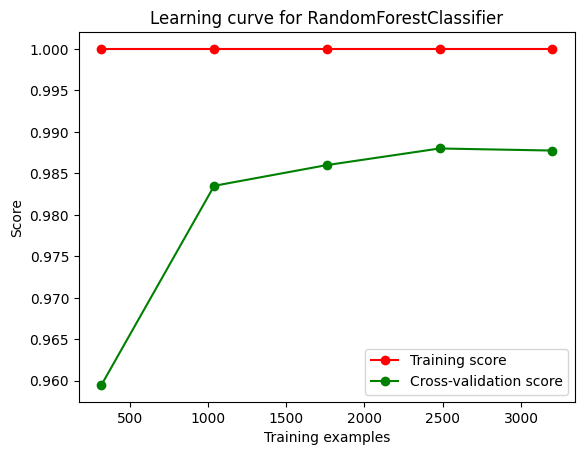

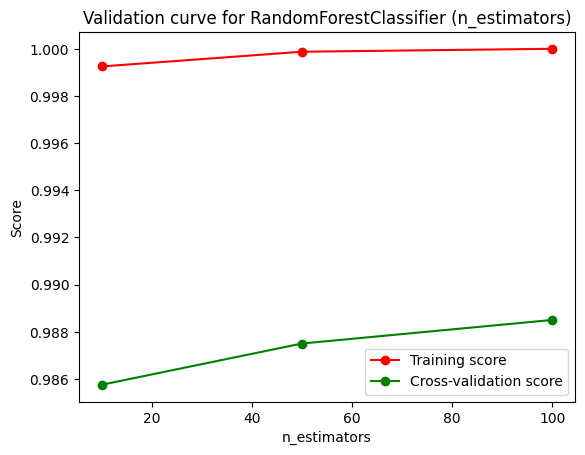

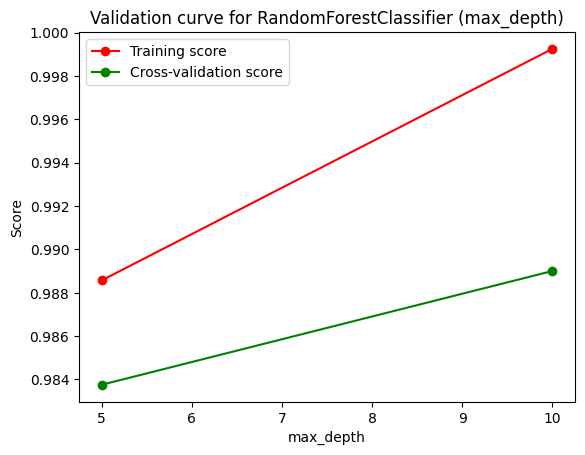

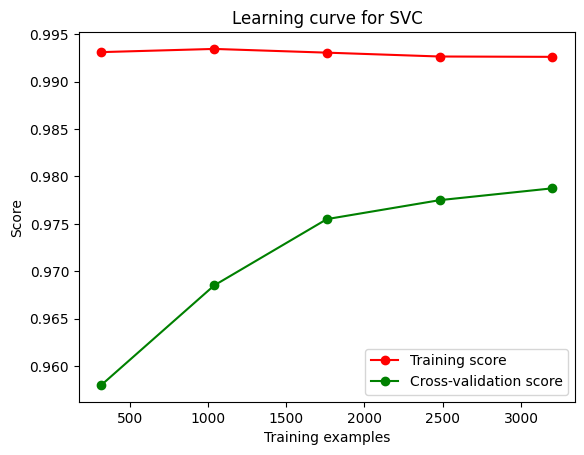

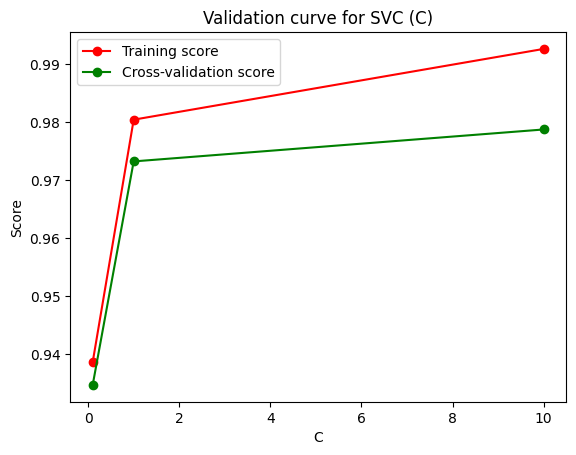

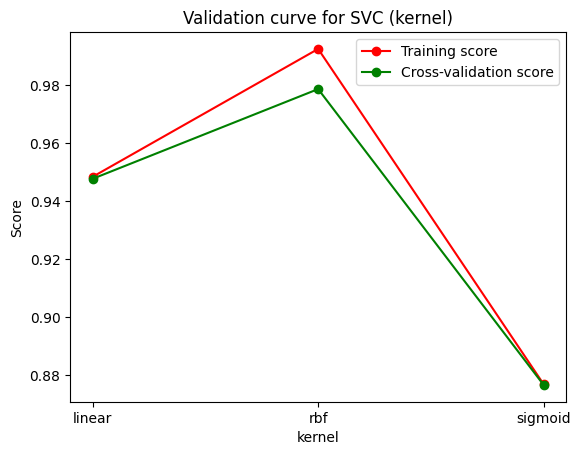

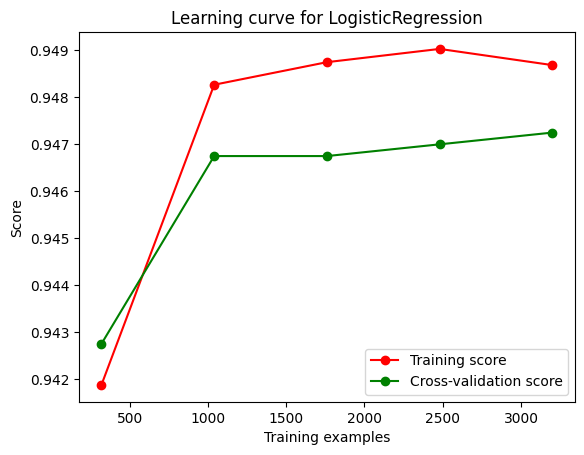

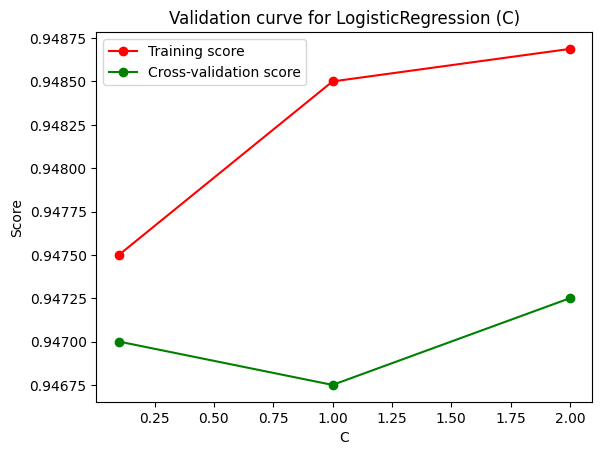

In [25]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, learning_curve, validation_curve


models = [   
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    {
        'name': 'SVC',
        'model': SVC(),
        'hyperparameters': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'sigmoid']
        }
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(),
        'hyperparameters': {
            'C': [0.1, 1, 2],
            # 'penalty': ['none', 'l2']
        }
    }
]

# Performing  grid search for each model
for model in models:
    print(model['name'])
    grid_search = GridSearchCV(model['model'], model['hyperparameters'], cv=5)
    grid_search.fit(X_train, y_train)
    print("grid_search.best_params_: ",grid_search.best_params_)

    print("accuracy on training data: ",grid_search.best_score_)
    print("accuracy on test data: ",grid_search.score(X_test, y_test))

    # FOR VISUALIZATION -------------

    train_sizes, train_scores, test_scores = learning_curve(
        grid_search.best_estimator_, X_train, y_train, cv=5)
    plt.figure()
    plt.title(f"Learning curve for {model['name']}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    # Plot validation curves for each hyperparameter
    for param_name, param_range in model['hyperparameters'].items():
        train_scores, test_scores = validation_curve(
            grid_search.best_estimator_, X_train, y_train, param_name=param_name, param_range=param_range, cv=5)
        plt.figure()
        plt.title(f"Validation curve for {model['name']} ({param_name})")
        plt.xlabel(f"{param_name}")
        plt.ylabel("Score")
        plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
        plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
        plt.legend(loc="best")